In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.style.use('ggplot')

In [2]:
data = pd.read_csv("data/data_clean.csv")
data.head()

,habitat,muestreot,familia,genero,guild,especies_final,abundancia,spvegabrev
0,areanatural,heladas,Halictidae,Lasioglossum,polinizador,lascos,1,solpub
1,areanatural,heladas,Halictidae,Lasioglossum,polinizador,lascos,1,agepic
2,areanatural,heladas,Halictidae,Lasioglossum,polinizador,lascos,1,agepic
3,areanatural,heladas,Halictidae,Lasioglossum,polinizador,lascos,1,agepic
4,areanatural,heladas,Halictidae,Lasioglossum,polinizador,lascos,1,agepic


# Distribución especies


Diagramas de venn de especies por temporada y area


In [4]:
from matplotlib_venn import venn2, venn3

d_habitat = ['areanatural', 'huerto']
d_muestre = ['heladas', 'secas', 'lluvias']

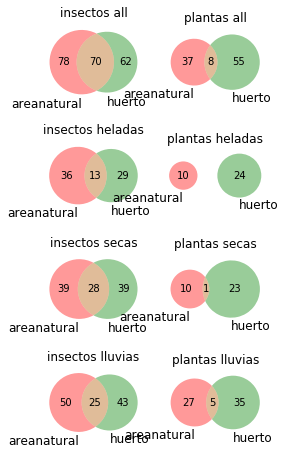

In [5]:
plt.figure(figsize=(4,8))

plt.subplot(421)
plt.title('insectos all')
i_data = [ set(data[data.habitat == h]['especies_final'].unique()) for h in d_habitat ]
venn2(i_data, set_labels = d_habitat)

plt.subplot(422)
plt.title('plantas all')
p_data = [ set(data[data.habitat == h]['spvegabrev'].unique()) for h in d_habitat ]
venn2(p_data, set_labels = d_habitat)

for i, m in zip( range(0,6,2), d_muestre):
    n_subplot = 423+i
    plt.subplot(n_subplot)
    plt.title('insectos '+m)
    i_data = [ set(data[(data.habitat == h) & (data.muestreot == m)]['especies_final'].unique()) for h in d_habitat ]
    venn2(i_data, set_labels = d_habitat)
    
    n_subplot = 424+i
    plt.subplot(n_subplot)
    plt.title('plantas '+m)
    p_data = [ set(data[(data.habitat == h) & (data.muestreot == m)]['spvegabrev'].unique()) for h in d_habitat ]
    venn2(p_data, set_labels = d_habitat)


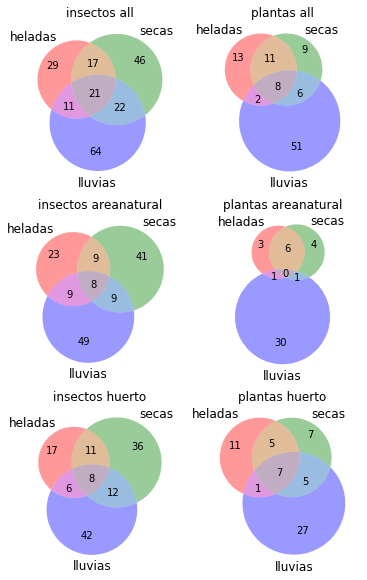

In [6]:
plt.figure(figsize=(6,10))

plt.subplot(321)
plt.title('insectos all')
i_data = [ set(data[data.muestreot == m]['especies_final'].unique()) for m in d_muestre ]
venn3(i_data, set_labels = d_muestre)

plt.subplot(322)
plt.title('plantas all')
p_data = [ set(data[data.muestreot == m]['spvegabrev'].unique()) for m in d_muestre ]
venn3(p_data, set_labels = d_muestre)

for i, h in zip( [0,2], d_habitat):
    n_subplot = 323+i
    plt.subplot(n_subplot)
    plt.title('insectos '+h)
    i_data = [ set(data[(data.muestreot == m) & (data.habitat == h)]['especies_final'].unique()) for m in d_muestre ]
    venn3(i_data, set_labels = d_muestre)

    n_subplot = 324+i
    plt.subplot(n_subplot)
    plt.title('plantas '+h)
    p_data = [ set(data[(data.muestreot == m) & (data.habitat == h)]['spvegabrev'].unique()) for m in d_muestre ]
    venn3(p_data, set_labels = d_muestre)




Si se ven las intersecciones esta pasando algo interesante

Hay plantas e insectos que pasan una temporada en un entorno, y otra temportada en otro
¿sabemos cuales son estos 'migrantes'?

El aluvial podría darnos estos datos, pero sale muy sucio como para leerlo
¿Que alternativa hay?

# Distribución espacio temporal por especie

Obtener un vector en orden: 
    * ['heladas', 'secas', 'lluvias']
Donde:
    * a areanatural
    * h huerto
    * b ambas
    * - ninguna
    
    
Resultados en total (especies plantas e insectos)

| Estación    |  1  |  2  |  3  | Total |
|-------------|-----|-----|-----|-------|
| Areanatural |  93 |  20 |   2 |  115  |
| Huerto      |  89 |  22 |   6 |  117  |
| Ambas       |  30 |   2 |   3 |   35  |
| Transición  |  NA |  25 |  18 |   43  |
| Total       | 212 |  69 |  29 |__310__|




<img src="plots/i_distribution.jpg">

El tamaño de la barra es el tamaño de la población en ese momento


In [7]:
node_distribution = pd.read_csv("data/data_clean_distribution.csv")
node_distribution.head()

,nodes,heladas,secas,lluvias
0,acaang,-,-,a
1,achalb,-,-,a
2,achmil,-,-,h
3,agatex,h,-,a
4,agepic,a,a,-


In [8]:
i1 = node_distribution.nodes
i2 = data.especies_final
node_distribution[i1.isin(i2)]#.to_csv("insect_distribution.csv")

,nodes,heladas,secas,lluvias
1,achalb,-,-,a
3,agatex,h,-,a
5,agesp1,a,a,a
6,agesp2,-,a,h
7,allarg,-,h,-
9,allfer,-,-,b
10,allmic,h,-,-
11,allneo,-,h,h
12,allobl,-,h,h
13,allsim,-,a,-
